In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/stepik/m4. inference/w4. tasks'
!ls

/content/drive/MyDrive/Colab Notebooks/stepik/m4. inference/w4. tasks
'4.2 bioinformatics.ipynb'   ab_browser_test.csv
'4.3 from github.ipynb'      churn_analysis.csv
'4.3 scoring.ipynb'	     credit_card_default_analysis.csv
'4.3 tests.ipynb'	    'default analysis peer review.ipynb'
'4.4 ab testing.ipynb'	     gene_high_throughput_sequencing.csv
'4.5 churn analysis.ipynb'  'peer work scoring.ipynb'


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import itertools
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportion_confint


Загрузим данные.

In [4]:
data = pd.read_csv('credit_card_default_analysis.csv')
n = data.shape[0]

In [5]:
limit_normal = data[data['default'] == 0]['LIMIT_BAL']
limit_default = data[data['default'] == 1]['LIMIT_BAL']

In [6]:
limit_default.value_counts().values

array([885, 698, 568, 363, 272, 270, 233, 210, 197, 187, 179, 176, 170,
       166, 157, 154, 137, 132, 117, 113, 110,  95,  92,  89,  87,  81,
        78,  69,  53,  51,  49,  44,  32,  32,  31,  28,  27,  26,  21,
        20,  18,  18,  12,  12,  11,  10,  10,   8,   8,   6,   6,   3,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [7]:
limit_normal.value_counts().values

array([2480, 1278, 1258, 1204, 1042,  923,  819,  776,  727,  641,  624,
        613,  592,  579,  572,  557,  547,  521,  509,  485,  459,  456,
        454,  434,  424,  380,  299,  296,  295,  268,  245,  240,  210,
        199,  185,  180,  156,  152,  150,  138,  136,  135,   73,   73,
         71,   70,   69,   66,   63,   56,   18,   17,   15,   13,   11,
         10,    9,    9,    8,    8,    8,    7,    6,    6,    5,    5,
          4,    3,    3,    3,    3,    2,    2,    2,    2,    2,    1,
          1,    1,    1])

In [8]:
print(np.var(limit_normal) - np.var(limit_default))
print(f'{np.var(limit_default):e}')
print(f'{np.var(limit_normal):e}')
sample1 = limit_default.values
sample2 = limit_normal.values

4015081932.2701454
1.331020e+10
1.732528e+10


In [9]:
print(np.percentile(sample2, np.linspace(0, 100, 101)))

[  10000.   10000.   20000.   20000.   20000.   20000.   20000.   30000.
   30000.   30000.   30000.   30000.   50000.   50000.   50000.   50000.
   50000.   50000.   50000.   50000.   50000.   50000.   50000.   60000.
   60000.   70000.   70000.   70000.   80000.   80000.   80000.   80000.
   80000.   90000.   90000.  100000.  100000.  100000.  110000.  110000.
  120000.  120000.  120000.  130000.  130000.  140000.  140000.  150000.
  150000.  150000.  150000.  160000.  160000.  160000.  170000.  170000.
  180000.  180000.  180000.  190000.  200000.  200000.  200000.  200000.
  200000.  210000.  210000.  210000.  220000.  220000.  230000.  230000.
  240000.  240000.  250000.  250000.  260000.  260000.  270000.  280000.
  290000.  290000.  300000.  300000.  310000.  320000.  340000.  350000.
  360000.  360000.  360000.  380000.  390000.  400000.  420000.  450000.
  480000.  500000.  500000.  500000. 1000000.]


In [10]:
def get_quantile_correlation(ds1, ds2):
    q = np.linspace(0, 100, 101)
    q1 = np.percentile(ds1, q)
    q2 = np.percentile(ds2, q)
    return stats.pearsonr(q1, q2)

In [11]:
print(np.median(sample1))
print(np.median(sample2))
print(stats.ks_2samp(sample1, sample1))
for shift in range(10000, 100000, 1000):
    shifted_sample1 = sample1 + shift
    # print(shift, stats.ks_2samp(shifted_sample1, sample2))

90000.0
150000.0
Ks_2sampResult(statistic=0.0, pvalue=1.0)


In [12]:
np.random.seed(0)
ns1 = np.random.normal(0, 1, 1000)
ns2 = np.random.normal(1, 1, 1000)
# get_quantile_correlation(ns1, ns2)
stats.ks_2samp(ns1, ns2 - 1)

Ks_2sampResult(statistic=0.045, pvalue=0.26347172719864703)

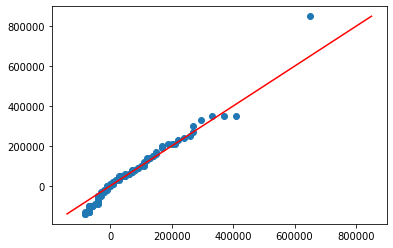

(0.9877118493625385, 1.2775138380354435e-81)


In [13]:
centralized_sample1 = sample1 - np.median(sample1)
centralized_sample2 = sample2 - np.median(sample2)
quantiles = np.linspace(0, 100, 101)
quantiles1 = np.percentile(centralized_sample1, quantiles)
quantiles2 = np.percentile(centralized_sample2, quantiles)
plt.scatter(quantiles1, quantiles2)
joined_sample = np.hstack([centralized_sample1, centralized_sample2])
limits = [np.min(joined_sample), np.max(joined_sample)]
plt.plot(limits, limits, c='r')
plt.show()
print(stats.pearsonr(quantiles1, quantiles2))

In [14]:
q = np.linspace(0, 100, 11)
percentile1 = np.percentile(centralized_sample1, q)
percentile2 = np.percentile(centralized_sample2, q)
print(percentile1)
print(percentile2)
stats.pearsonr(percentile1, percentile2)

[-80000. -70000. -60000. -40000. -30000.      0.  30000.  70000. 120000.
 210000. 650000.]
[-140000. -120000. -100000.  -70000.  -30000.       0.   50000.   80000.
  140000.  210000.  850000.]


(0.9969092631130915, 2.956450767038329e-11)

In [15]:
stats.ks_2samp(centralized_sample1, centralized_sample2)

Ks_2sampResult(statistic=0.24944358842663927, pvalue=9.725712821432953e-280)

## Cliff's delta

In [16]:
from __future__ import division


def cliffsDelta(lst1, lst2, **dull):
    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m * n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [17]:
cliffsDelta(limit_normal, limit_default)

(0.23560528533978436, 'small')

## Permutation test

In [18]:

from mlxtend.evaluate import permutation_test

p_value = permutation_test(limit_normal, limit_default,
                           method='approximate',
                           num_rounds=100,
                           seed=0)
print(f'{p_value:e}')

0.000000e+00


In [25]:
df = pd.read_csv('credit_card_default_analysis.csv')
df.loc[df['default'] == 0, 'LIMIT_BAL'] = df.loc[df['default'] == 0, 'LIMIT_BAL'] - 150000
df.loc[df['default'] == 1, 'LIMIT_BAL'] = df.loc[df['default'] == 1, 'LIMIT_BAL'] - 90000



In [35]:
df[df['default'] == 1]['LIMIT_BAL'].value_counts().values

array([885, 698, 568, 363, 272, 270, 233, 210, 197, 187, 179, 176, 170,
       166, 157, 154, 137, 132, 117, 113, 110,  95,  92,  89,  87,  81,
        78,  69,  53,  51,  49,  44,  32,  32,  31,  28,  27,  26,  21,
        20,  18,  18,  12,  12,  11,  10,  10,   8,   8,   6,   6,   3,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [36]:
df[df['default'] == 0]['LIMIT_BAL'].value_counts().values

array([2480, 1278, 1258, 1204, 1042,  923,  819,  776,  727,  641,  624,
        613,  592,  579,  572,  557,  547,  521,  509,  485,  459,  456,
        454,  434,  424,  380,  299,  296,  295,  268,  245,  240,  210,
        199,  185,  180,  156,  152,  150,  138,  136,  135,   73,   73,
         71,   70,   69,   66,   63,   56,   18,   17,   15,   13,   11,
         10,    9,    9,    8,    8,    8,    7,    6,    6,    5,    5,
          4,    3,    3,    3,    3,    2,    2,    2,    2,    2,    1,
          1,    1,    1])

In [38]:
ct = pd.crosstab(df['LIMIT_BAL'], df['default'])
print(ct)

default       0  1
LIMIT_BAL         
-140000     296  0
-134000       2  0
-130000    1278  0
-120000    1042  0
-110000     138  0
...         ... ..
 610000       1  0
 620000       0  1
 630000       2  1
 650000       2  1
 850000       1  0

[82 rows x 2 columns]


In [34]:
stat, pv, _, expected = stats.chi2_contingency(ct)
expected[expected < 5].shape

(47,)

In [24]:
df.loc[df['default'] == 0, 'LIMIT_BAL'] = df.loc[df['default'] == 0, 'LIMIT_BAL'] + 10000
df[df['default'] == 0]['LIMIT_BAL'].median()

-140000.0